# Load Libraries & Data
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [2]:
X_train = np.load("../data/processed/X_train.npy")
X_test  = np.load("../data/processed/X_test.npy")
y_train = np.load("../data/processed/y_train.npy")
y_test  = np.load("../data/processed/y_test.npy")


In [3]:
# Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [4]:
# Predictions & Probabilities
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]


In [5]:
# Evaluate Performance
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.82      0.81        98

    accuracy                           1.00     56962
   macro avg       0.90      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [6]:
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
roc_auc_rf


0.9804269836803601

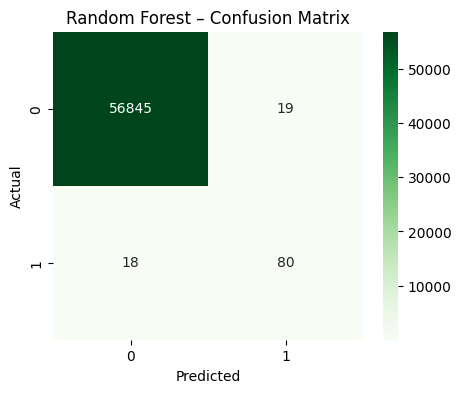

In [7]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest – Confusion Matrix")

plt.savefig("../results/random_forest_confusion_matrix.png", bbox_inches="tight")
plt.show()


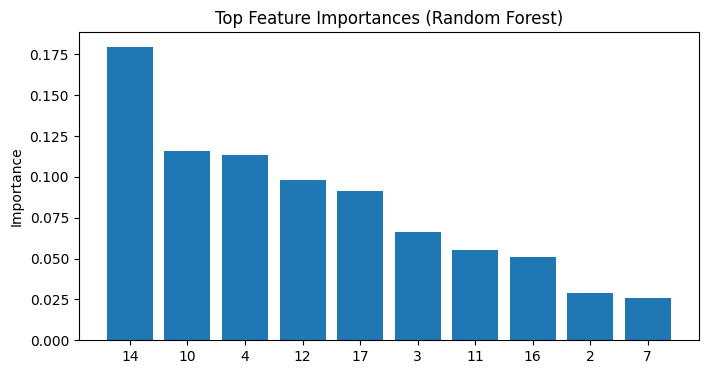

In [8]:
# Feature Importance
importances = rf_model.feature_importances_

indices = np.argsort(importances)[::-1][:10]

plt.figure(figsize=(8,4))
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), indices)
plt.title("Top Feature Importances (Random Forest)")
plt.ylabel("Importance")

plt.savefig("../results/random_forest_feature_importance.png", bbox_inches="tight")
plt.show()


## Random Forest Model Interpretation (NIW Perspective)

The Random Forest model significantly improves fraud detection performance by capturing 
non-linear transaction patterns that traditional models may miss.

Such models are widely used in financial institutions to reduce fraud losses while 
maintaining customer trust. Improved detection accuracy directly contributes to 
economic protection and financial system resilience in the United States.
